#ÍÑIGO RUIZ MARTÍNEZ - MAYO 2023

##**EJERCICIO TEXT MINING** -  

Para este ejercicio trabajaremos con un conjunto de datos reales publicados para la shared-task ProfNER, celebrada en el año 2021. Específicamente, se pide utilizar los datos textuales de la subtarea 1, centrada en la clasificación de textos. Este conjunto de datos son tweets en español que tienen asignada una etiqueta numérica, que representa la presencia (valor 1) o no (valor 0) de menciones de profesiones en el tweet.
Para el ejercicio se busca entrenar diferentes modelos de clasificación que permitan clasificar correctamente los tweets. Para ello será necesario crear y utilizar funciones de preprocesado de datos similares a las vistas en clase, aplicar estrategias de vectorización de trextos como TF-IDF o embeddings, y entrenar/evaluar modelos de clasificación.
-  Análisis exploratorio, pre-procesado y normalización de los datos:
  -  El ejercicio contendrá un análisis exploratorio de los datos como
número de documentos, gráficas de distribución de longitudes y/o wordclouds, entre otros análisis.
  - Funciones para normalizar textos que permitan eliminar palabras vacías, quitar símbolos de puntuación y lematizar o hacer stemming.
- Vectorización de textos:
  - Diferentes estrategias de vectorización como TF-IDF y Word Embeddings. Incorporar características adicionales utilizando el sentimiento de los documentos.
- Entrenamiento y validación del sistema:
  - Testear al menos 3 modelos de clasificación, estimar el rendimiento de
varios algoritmos de forma general, para posteriormente seleccionar el mejor para ajustar los hiperparámetros.

# Preparación datos

In [ ]:
# Descarga de archivos de ProfNER
!wget https://zenodo.org/record/4563995/files/profner.zip?download=1
# Si el unzip no funciona, revisar cual es el nombre de descarga del archivo
!unzip  profner.zip?download=1

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: profner/subtask-1/test-background-txt-files/1243953060050763778.txt  
  inflating: profner/subtask-1/test-background-txt-files/1243988693947486209.txt  
  inflating: profner/subtask-1/test-background-txt-files/1244173600753618945.txt  
  inflating: profner/subtask-1/test-background-txt-files/1244319340062822405.txt  
  inflating: profner/subtask-1/test-background-txt-files/1247000104193712129.txt  
  inflating: profner/subtask-1/test-background-txt-files/1247263989249212416.txt  
  inflating: profner/subtask-1/test-background-txt-files/1247465550931988482.txt  
  inflating: profner/subtask-1/test-background-txt-files/1249075777544556545.txt  
  inflating: profner/subtask-1/test-background-txt-files/1249253729720766466.txt  
  inflating: profner/subtask-1/test-background-txt-files/1249964965546668034.txt  
  inflating: profner/subtask-1/test-background-txt-files/1249980196838682624.txt  
  inflating: profner/subta

Funciones de carga y preparación de datos

In [ ]:
import sys
import os
import pandas as pd
def get_tweet_content(list_paths):
  """
    Función para guardar en un diccionario el contenido de archivos txt
    que se introduce en su entrada.
    Devuelve un diccionario en el que las claves son el id del tweet, y
    el valor el texto del tweet.
  """
  output_dict = dict()
  for i in list_paths:
    tweet_id = i.split("/")[-1].split(".txt")[0]
    with open(i) as f:
      output_dict[int(tweet_id)] = f.read()

  return output_dict

def get_profner_data(profner_path_data):
    # Obtenemos el path a los txt de los tweets.
    path_to_txt = profner_path_data+"subtask-1/train-valid-txt-files/"
    tweets_train_files = [path_to_txt+"train/"+i for i in os.listdir(path_to_txt+"train/")]
    tweets_valid_files = [path_to_txt+"valid/"+i for i in os.listdir(path_to_txt+"valid/")]
    # Obtenemos diccionarios en los que el key es el tweet_id y el value el texto del tweet.
    train_txt_content = get_tweet_content(tweets_train_files)
    valid_txt_content = get_tweet_content(tweets_valid_files)

    # Cargamos dos dataframes con los tweet_id y la categoría de los tweets
    path_to_labeled = profner_path_data+"subtask-1/"
    train_tweets = pd.read_csv(path_to_labeled+"train.tsv",sep="\t")
    valid_tweets = pd.read_csv(path_to_labeled+"valid.tsv",sep="\t")

    # Introducimos a los df el campo de texto mapeando los diccionarios con tweet_id
    train_tweets["tweet_text"] = train_tweets['tweet_id'].map(train_txt_content)
    train_tweets["set"] = "train"
    valid_tweets["tweet_text"] = valid_tweets['tweet_id'].map(valid_txt_content)
    valid_tweets["set"] = "valid"

    # Concatenamos el resultado
    output_df = pd.concat([train_tweets,valid_tweets],axis=0)
    # Eliminamos retorno de carro
    output_df["tweet_text"] = output_df.tweet_text.apply(lambda x: x.replace('\n', ' '))
    return output_df[["tweet_id","tweet_text","label","set"]].reset_index(drop=True)

# Ejercicio


En este ejercicio se trabajará con un conjunto de datos reales publicados para la shared-task [ProfNER](https://temu.bsc.es/smm4h-spanish/), celebrada en el año 2021. Específicamente, se utilizarán los datos textuales de la subtarea 1, centrada en la clasificación de textos. Este conjunto de datos son tweets en español que tienen asignada una etiqueta numérica, que representa la presencia (valor 1) o no (valor 0) de menciones de profesiones en el tweet. Por si fuera de tu interés, el proceso de obtención, selección y anotación de datos está descrita en [este enlace.](https://temu.bsc.es/smm4h-spanish/?p=4003).

Para el ejercicio debéis entrenar diferentes modelos de clasificación que permitan clasificar correctamente los tweets. Para ello será necesario crear y utilizar funciones de preprocesado de datos similares a las vistas en clase, aplicar estrategias de vectorización de trextos como TF-IDF o embeddings, y entrenar/evaluar modelos de clasificación. Para que os sirva de orientación, los criterios de evaluación del ejercicio serán los siguientes:

-	**Análisis exploratorio, pre-procesado y normalización de los datos (30%)**:
        -	El ejercicio deberá contener un análisis exploratorio de los datos como número de documentos, gráficas de distribución de longitudes y/o wordclouds, entre otros análisis que se os pudieran ocurrir. Vuestros ejercicios deberán incorporar al menos los análisis exploratorios vistos en clase.

    -	También tendréis que tener funciones para normalizar textos que permitan eliminar palabras vacías, quitar símbolos de puntuación y lematizar o hacer stemming.  

-	**Vectorización de textos (40%)**

    En clase hemos visto diferentes estrategias de vectorización como TF-IDF y Word Embeddings. También hemos visto como incorporar características adicionales utilizando el sentimiento de los documentos. Para este ejercicio sois libres de utilizar la estrategia de vectorización que queráis, pero:
  -	Si decidís utilizar TF-IDF será necesarios que incorporéis a modelo características adicionales de sentimiento utilizando recursos adicionales (como por ejemplo la librería TextBlob).
  -	Si optáis por representar el texto mediante embeddings, dado que en clase no se profundizado sobre el tema no será necesario incorporar esas características adicionales. Si decidís esta segunda opción, podéis utilizar los embeddings en español que vimos en clase

-	**Entrenamiento y validación del sistema (30%)**
  -	En el proceso de entrenamiento del modelo tendréis que testear al menos 3 modelos de clasificación. El procedimiento debe ser similar al visto en clase, en el que primero estimábamos el rendimiento de varios algoritmos de forma general, para posteriormente seleccionar el mejor para ajustar los hiperparámetros.


## 0. Imports


In [ ]:
#import nltk
#import sys
#from textblob import TextBlob
#import matplotlib.pyplot as plt
#import numpy as np
#import pandas as pd
#import seaborn as sns
#import contractions
#import re
#from emoji_extractor.extract import Extractor
#from nltk.tokenize import TweetTokenizer
#from nltk.corpus import stopwords
#import en_core_web_sm
#from sklearn.feature_extraction.text import TfidfVectorizer
#from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import f1_score, confusion_matrix
#from sklearn.metrics import classification_report
#from sklearn.feature_extraction.text import CountVectorizer
#from gensim.corpora import Dictionary
#from gensim.models.ldamodel import LdaModel
#from gensim.models import CoherenceModel
#from nltk.corpus import stopwords
#import nltk
#nltk.download('stopwords')
#import pandas as pd
#import re
#import numpy as np
#from nltk import word_tokenize, pos_tag
#from transformers import (
#   AutoConfig,
#   AutoTokenizer,
#   TFAutoModelForSequenceClassification,
#   AdamW
#)
#import tensorflow as tf
#import pandas as pd
#from sklearn.model_selection import train_test_split
#np
#plt
#sns


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install spacy
!python -m spacy download es_core_news_sm
import es_core_news_sm
import sys
!{sys.executable} -m pip install contractions
import contractions
import re
import nltk
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn.feature_extraction.text import TfidfVectorizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2023-05-17 00:35:39.478652: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-17 00:35:40.512249: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 30.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 13.4 MB/s eta 0:00:00
   

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import scipy as sp
# Definimos las funcionalidades pertinentes de sklearn:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import warnings
# Definimos la función encargada de evaluar los modelos:
def model_evaluation(models, score, X, y):
      results = []
      names = []
      #PAra cada modelo
      for name, model in models:
          warnings.filterwarnings('ignore')
          # Generamos un Kfold
          KF = KFold(n_splits = 8, shuffle = True, random_state = 98)

          # hacemos croos_val
          cv_results = cross_val_score(model, X, y, cv = KF, scoring = score, verbose = False)

          # Guardamos los resultados:
          results.append(cv_results)
          names.append(name)

          # Mostramos los resultados numéricamente:
          print('Metric: {} , KFold '.format(str(score)))
          print("%s: %f (%f) " % (name, cv_results.mean(), cv_results.std()))

      return results, names
# Cargamos los modelos que se van a aplicar
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
# Grid search
from sklearn.model_selection import (KFold, cross_val_score,cross_validate)
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from imblearn.under_sampling import RandomUnderSampler
# Cargamos las metricas de evaluacion del modelo ganador
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import classification_report

from imblearn.over_sampling import SMOTE


### Funciones resto

In [ ]:
#PARA NORMALIZACIÓN

# Eliminar los emojis de un texto. Esto es útil porque una vez extraido los emojis
# puede interesarnos tener un texto sin presencia de emojis para mejor análisis.
def clean_emoji(text):
    # Poner todos los comandos de http://www.unicode.org/Public/emoji/1.0/emoji-data.txt
    emoji_pattern = re.compile("["
        u"\U0001F300-\U0001F6FF"  # symbols & pictographs
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u'\u2600-\u26FF\u2700-\u27BF'
        u'\u2934' u'\u2935' u'\u2B05' u'\u2B06' u'\u2B07' u'\u2B1B' u'\u2B1C'
        u'\u2B50' u'\u2B55' u'\u3030' u'\u303D' u'\u3297' u'\u3299' u'\u00A9'
        u'\u00AE' u'\u203C' u'\u2049' u'\u2122' u'\u2139' u'\u2194-\u2199'
        u'\u21A9' u'\u21AA' u'\u231A' u'\u231B' u'\u2328' u'\u23CF'
        u'\u23E9-\u23F3' u'\u23F8' u'\u23F9' u'\u23FA' u'\u24C2' u'\u25AA'
        u'\u25AB' u'\u25B6' u'\u25C0' u'\u25FB' u'\u25FD' u'\u25FC' u'\u25FE'
        ']+', flags=re.UNICODE)
    string2 = re.sub(emoji_pattern,r' ',text)
    return string2

# Tokenizar los tweets con el tokenizador "TweetTokenizer" de NLTK
def tokenize(texto):
  tweet_tokenizer = TweetTokenizer()
  tokens_list = tweet_tokenizer.tokenize(texto)
  return tokens_list

def quitar_stopwords(lista_palabras):
    stopwords_es = set(stopwords.words('spanish'))
    palabras_filtradas = [palabra for palabra in lista_palabras if palabra.lower() not in stopwords_es]
    return palabras_filtradas


# Eliminar signos de puntuación de una lista de tokens
# (nos quedamos sólo lo alfanumérico en este caso)
def quitar_puntuacion(tokens):
    words=[word for word in tokens if word.isalnum()]
    return words


# Lemmatization de los tokens. Devuelve una string entera para hacer la tokenización
# con NLTK
import spacy
nlp = spacy.load('es_core_news_sm')
def lematizar(tokens):
    sentence = " ".join(tokens)
    mytokens = nlp(sentence)
    # Lematizamos los tokens y los convertimos  a minusculas
    mytokens = [ word.lemma_ if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
    # Extraemos el text en una string
    return " ".join(mytokens)

# Reemplazar contracciones y slang en inglés usando la librería "contractions" https://github.com/kootenpv/contractions
def replace_contraction(text):
    expanded_words = []
    # Divide el texto
    for t in text.split():
        # Aplica la función fix en cada sección o token del texto buscando contracciones y slang
        expanded_words.append(contractions.fix(t, slang = True))
    expanded_text = ' '.join(expanded_words)
    return expanded_text

In [ ]:
#PARA EMOJIS

!wget https://github.com/luisgasco/ntic_master_datos/raw/main/datasets/datos_twitter_master.tsv
!pip install emoji_extractor
!pip install emoji

# Download emoji sentiment
!wget https://www.clarin.si/repository/xmlui/handle/11356/1048/allzip
!unzip allzip

from emoji_extractor.extract import Extractor

# Función para extraer emojis del texto en formato lista
def extract_emojis(text):
  extract = Extractor()
  emojis = extract.count_emoji(text, check_first=False)
  emojis_list = [key for key, _ in emojis.most_common()]
  return emojis_list

# Preparar diccionario de emojis
def load_emoji_sentiment(path):
  # Cargamos el csv de emoji_sentiment
  emoji_sent_df = pd.read_csv(path,sep=",")
  # Calculamos los scores dividiendo el número de emojis negativos y entre el total
  emoji_sent_df["Negative"] = emoji_sent_df["Negative"]/emoji_sent_df["Occurrences"]
  emoji_sent_df["Neutral"] = emoji_sent_df["Neutral"]/emoji_sent_df["Occurrences"]
  emoji_sent_df["Positive"] = emoji_sent_df["Positive"]/emoji_sent_df["Occurrences"]
  # Transformamos a dict
  emoji_sent_df = emoji_sent_df.set_index('Emoji')
  emoji_dict = emoji_sent_df.to_dict(orient="index")
  return emoji_dict

# Calcula el sentimiento de los emojis de una lista utilizando el diccionario
# de emoji sentiment score generado previamente con la función load_emoji_sentiment()
# Se puede extraer el valor de positividad de los emojis con la option "positive"
# Se puede extraer el valor de neutralidad de los emojis con la option "neutral""
# Se puede extraer el valor de e negatividad de los emojis con la option "negative"
def get_emoji_sentiment(lista, option = "positive"):
  output = 0
  for emoji in lista:
    try:
      if option == "positive":
        output = output + emoji_sent_dict[emoji]["Positive"]
      elif option =="negative":
        output = output + emoji_sent_dict[emoji]["Negative"]
      elif option =="neutral":
        output = output + emoji_sent_dict[emoji]["Neutral"]
    except Exception as e:
      continue
  return output

--2023-05-17 00:36:08--  https://github.com/luisgasco/ntic_master_datos/raw/main/datasets/datos_twitter_master.tsv
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/luisgasco/ntic_master_datos/main/datasets/datos_twitter_master.tsv [following]
--2023-05-17 00:36:09--  https://raw.githubusercontent.com/luisgasco/ntic_master_datos/main/datasets/datos_twitter_master.tsv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 113587 (111K) [text/plain]
Saving to: ‘datos_twitter_master.tsv’

datos_twitter_maste 100%[===================>] 110.92K  --.-KB/s    in 0.008s  

2023-05-17 00:36:09 (13.7 MB/s) - ‘dato

In [ ]:
#PARA ANÁLISIS DE SENTIMIENTO

url_path = "https://www.cic.ipn.mx/~sidorov/SEL.txt"
sel_lexicon = pd.read_csv(url_path,sep="\t", encoding="latin-1")

dicc_mapping = {"Alegría":"positive",
                "Sorpresa":"positive",
                "Tristeza":"negative",
                "Enojo":"negative",
                "Miedo":"negative",
                "Repulsión":"negative"}

sel_lexicon["Categoría"] = sel_lexicon["Categoría"].map(dicc_mapping)

positive_words = dict(zip(sel_lexicon[sel_lexicon["Categoría"]=="positive"].Palabra, sel_lexicon[sel_lexicon["Categoría"]=="positive"][' PFA']))
negative_words = dict(zip(sel_lexicon[sel_lexicon["Categoría"]=="negative"].Palabra, sel_lexicon[sel_lexicon["Categoría"]=="negative"][' PFA']))

def calculate_sentiment(frase, positive_words, negative_words):
  """
  Función para calcular el score de sentimiento de una frase

  Args:
    frase [str]: Frase pre-preprocesada en español. Debe venir lematizada.
    positive_words [dict]: Diccionario de palabras positivas extraidas de SEL
    negative_words [dict]: Diccionario de palabras negativas extraídas de SEL

  Out:
    Sentiment score
  """
  score = 0
  for i in frase.split():
    if i in positive_words:
      score = score + float(positive_words[i])
    elif i in negative_words:
      score = score - float(negative_words[i])
    else:
      score = score + 0

  return score

## 1. Obtención del corpus
Para la obtención de los datos teneis disponible la función `get_profner_data()`. Esta función prepara los datos del ejercicio en formato Pandas dataframe para que podais realizarlo.

In [ ]:
profner_path = "./profner/"
datos_ejercicio = get_profner_data(profner_path)

In [ ]:
datos_ejercicio

,tweet_id,tweet_text,label,set
0,1256007275807997953,CHINA: libera una pandemia EE.UU: libera OVNIS...,0,train
1,1257909427677601792,San Francisco (EEUU) hace 100 años tras vivir ...,0,train
2,1281580572415066112,Porfi poneos la mascarilla o tendremos 28 nuev...,0,train
3,1271348112733470720,El nuevo „covid normas y reglas recibimiento“ ...,0,train
4,1270421287148695556,Si el confinamiento ha dejado algo tocada tu e...,0,train
...,...,...,...,...
7995,1263939682662002689,#LoMásLeído | Los nuevos infectados de coronav...,0,valid
7996,1259976635891306516,Ayuso adjudica a dedo un contrato de 30.000 eu...,1,valid
7997,1277128552153055232,Meses encerrados. Se puede viajar a otras prov...,0,valid
7998,1267915731422916613,El gobierno prohíbe por ley lis despidos duran...,0,valid


## 2. Análisis exploratorio

Comprobamos en primer lugar el **número de documentos y columnas** que tiene el dataset, es decir el número de tweets que tendremos, así como el número de variables o columnas:

In [ ]:
print("El dataframe tiene {} tweets.".format(len(datos_ejercicio)))
print("El dataframe tiene {} columnas.".format(datos_ejercicio.shape[1]))

El dataframe tiene 8000 tweets.
El dataframe tiene 4 columnas.


Comprobamos ahora el **número de tweets duplicados** y el **número de valores nulos** en las cuatro columnas:


In [ ]:
print("Existen {} noticias duplicadas.".format(np.sum(datos_ejercicio.duplicated(subset=["tweet_text"]))))

Existen 0 noticias duplicadas.


In [ ]:
print("Hay {} valores vacíos en los ids, {} valores vacíos en los tweets, {} valores vacíos en las etiquetas y {} valores vacíos en el set."
.format(np.sum(datos_ejercicio.isnull())[0], np.sum(datos_ejercicio.isnull())[1], np.sum(datos_ejercicio.isnull())[2], np.sum(datos_ejercicio.isnull())[3]))

Hay 0 valores vacíos en los ids, 0 valores vacíos en los tweets, 0 valores vacíos en las etiquetas y 0 valores vacíos en el set.


Contamos el **número de documentos de cada clase**. En la columna "label" nos encontramos las etiquetas del dataset:
- label = 1: tweets que hacen mención a profesiones
- label = 0: tweets que NO hacen mención a profesiones

In [ ]:
print(datos_ejercicio["label"].value_counts())

0    6130
1    1870
Name: label, dtype: int64


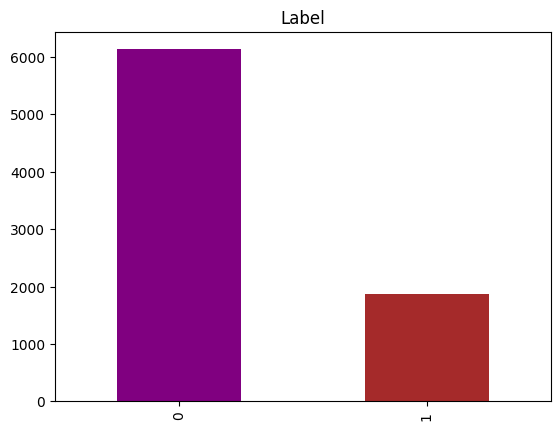

In [ ]:
ax, fig = plt.subplots()
etiquetas = datos_ejercicio.label.value_counts()
etiquetas.plot(kind= 'bar', color= ["purple", "brown"])
plt.title('Label')
plt.show()

Dataframe claramente desbalanceado hacia los valores 0 que equivalían a los tweets que hacen menciones a las profesiones. Habrá que proponer una solución para rebalancear estos datos y obtener mejor resultado en el entrenamiento de los modelos.

Comprobamos la **distribución de la longitud de los tweets en caracteres:

In [ ]:
datos_ejercicio["char_len"] = datos_ejercicio["tweet_text"].apply(lambda x: len(x))

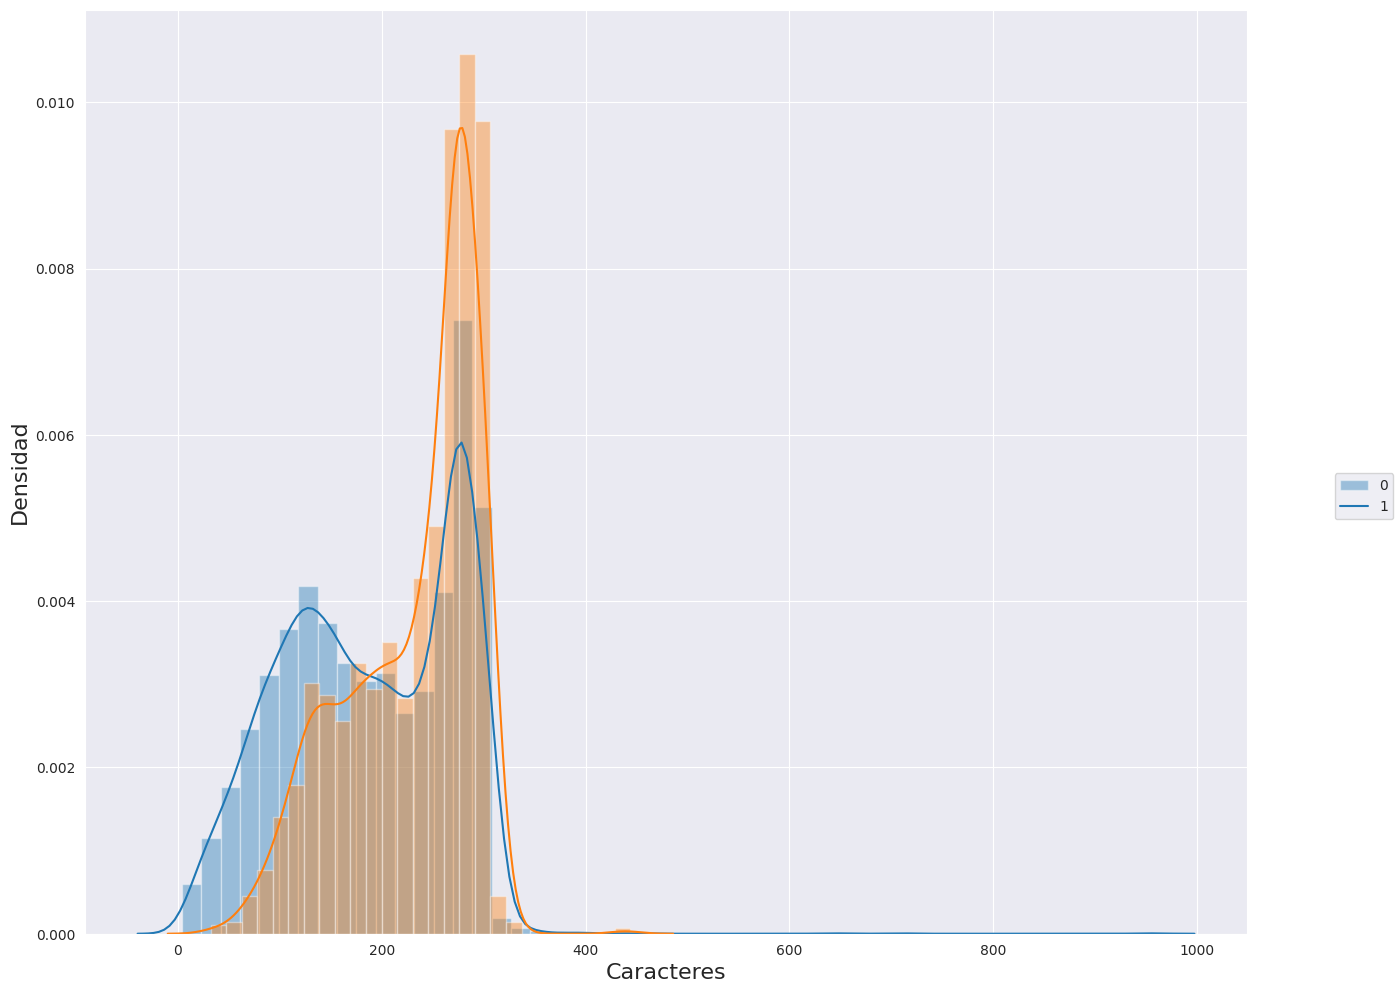

In [ ]:
fig = plt.figure(figsize=(15,12))
sns.set_style("darkgrid")
# añadimos series para cada categoría (eligiendo la seríe de char_len)
plt1 = sns.distplot(datos_ejercicio[datos_ejercicio.label==0].char_len, hist=True, label="0")
plt2 = sns.distplot(datos_ejercicio[datos_ejercicio.label==1].char_len, hist=True, label="1")
fig.legend(labels=['0','1'], loc = 5)

# Definimos el título de los ejes:
plt.xlabel('Caracteres', fontsize=16)
plt.ylabel('Densidad', fontsize=16)

# Finalmente mostramos el gráfico:
plt.show()

Aunque las distribuciones no son claramente diferentes, parece que hay una relación entre las menciones de profesiones en los tweets y la longitud de los mismos. Los tweets que tienen menos de 200 caracteres de longitud tienen mayor cantidad de tweets sin menciones.

## 3. Preprocesado y Normalización

### 3.1 Emojis

Vamos a extraer los emojis, y ver qué cuales hemos guardado:

In [ ]:
datos_ejercicio["emoji_list"] = datos_ejercicio["tweet_text"].apply(lambda x: extract_emojis(x))

In [ ]:
datos_ejercicio["emoji_list"]

0        []
1        []
2        []
3        []
4        []
       ... 
7995     []
7996     []
7997     []
7998    [🤮]
7999    [🤣]
Name: emoji_list, Length: 8000, dtype: object

A continuación calculamos el score de sentimiento a los emojis asociados a cada tweet. (Si no hay emojis, estos scores serán cero)

In [ ]:
datos_ejercicio["sent_emoji_pos"] = datos_ejercicio["emoji_list"].apply(lambda x: get_emoji_sentiment(x,option = "positive"))
datos_ejercicio["sent_emoji_neu"] = datos_ejercicio["emoji_list"].apply(lambda x: get_emoji_sentiment(x,option = "neutral"))
datos_ejercicio["sent_emoji_neg"] = datos_ejercicio["emoji_list"].apply(lambda x: get_emoji_sentiment(x,option = "negative"))

### 3.2. Preprocesamiento de textos

En primer lugar **expandimos las contracciones**. Además, despues del proceso de extracción de emojis, los quitaremos de nuestros textos porque no nos serán útiles.

In [ ]:
# Reemplazar contracciones
datos_ejercicio["tweet_text_processed"] = datos_ejercicio["tweet_text"].apply(lambda x: replace_contraction(x))
# Quitar emojis de los textos (CleanEmoji de tweet_text_processed)
datos_ejercicio["tweet_text_processed"] = datos_ejercicio["tweet_text_processed"].apply(lambda x: clean_emoji(x))



Despues **tokenizamos el texto**, y trabajaremos en limpiar los tokens que no son útiles en este problema para reducir dimensionalidad

In [ ]:
datos_ejercicio["tokenized"] = datos_ejercicio["tweet_text_processed"].apply(lambda x: tokenize(x))

In [ ]:
datos_ejercicio.head(3)

,tweet_id,tweet_text,label,set,char_len,emoji_list,sent_emoji_pos,sent_emoji_neu,sent_emoji_neg,tweet_text_processed,tokenized
0,1256007275807997953,CHINA: libera una pandemia EE.UU: libera OVNIS...,0,train,87,[],0,0,0,CHINA: libera una pandemia EE.UU: libera OVNIS...,"[CHINA, :, libera, una, pandemia, EE.UU, :, li..."
1,1257909427677601792,San Francisco (EEUU) hace 100 años tras vivir ...,0,train,90,[],0,0,0,San Francisco (EEUU) hace 100 años tras vivir ...,"[San, Francisco, (, EEUU, ), hace, 100, años, ..."
2,1281580572415066112,Porfi poneos la mascarilla o tendremos 28 nuev...,0,train,95,[],0,0,0,Porfi poneos la mascarilla o tendremos 28 nuev...,"[Porfi, poneos, la, mascarilla, o, tendremos, ..."


Procesamos los tokens (pendientes de que el texto está en español):
- **Quitando stopwords**
- **Quitando la puntuación***
- **Lematizando**

In [ ]:
# Quitar stopwords (quitar_stopwords)
datos_ejercicio["tokenized_clean"] = datos_ejercicio["tokenized"].apply(lambda x: quitar_stopwords(x))
# Quitamos los símbolos de puntuación (quitar_puntuacion)
datos_ejercicio["tokenized_clean"] = datos_ejercicio["tokenized_clean"].apply(lambda x: quitar_puntuacion(x))
# Lematizamos (lematizar)
datos_ejercicio["lematizacion"] = datos_ejercicio["tokenized_clean"].apply(lambda x: lematizar(x))

In [ ]:
datos_ejercicio.head(3)

,tweet_id,tweet_text,label,set,char_len,emoji_list,sent_emoji_pos,sent_emoji_neu,sent_emoji_neg,tweet_text_processed,tokenized,tokenized_clean,lematizacion
0,1256007275807997953,CHINA: libera una pandemia EE.UU: libera OVNIS...,0,train,87,[],0,0,0,CHINA: libera una pandemia EE.UU: libera OVNIS...,"[CHINA, :, libera, una, pandemia, EE.UU, :, li...","[CHINA, libera, pandemia, libera, OVNIS, ARGEN...",CHINA libero pandemia libero OVNIS ARGENTINA l...
1,1257909427677601792,San Francisco (EEUU) hace 100 años tras vivir ...,0,train,90,[],0,0,0,San Francisco (EEUU) hace 100 años tras vivir ...,"[San, Francisco, (, EEUU, ), hace, 100, años, ...","[San, Francisco, EEUU, hace, 100, años, tras, ...",San Francisco EEUU hacer 100 año tras vivir pa...
2,1281580572415066112,Porfi poneos la mascarilla o tendremos 28 nuev...,0,train,95,[],0,0,0,Porfi poneos la mascarilla o tendremos 28 nuev...,"[Porfi, poneos, la, mascarilla, o, tendremos, ...","[Porfi, poneos, mascarilla, 28, nuevas, cancio...",Porfi poneo mascarilla 28 nuevo canción artist...


Para realizar el **análisis de sentimiento** no utilizamos TextBlob o los módulos de nltk visto en clase, ya que sólo funcionan correctamente con textos en inglés, si no que utilizamos los datos de "Spanish Emoticon Lexicon" de la web de Grigori Sidorov:

Lo aplicamos sobre la lematización para que el resultado sea algo mejor.

In [ ]:
datos_ejercicio["sentimiento"] = datos_ejercicio["lematizacion"].apply(lambda x: calculate_sentiment(x, positive_words, negative_words))

In [ ]:
datos_ejercicio.head()

,tweet_id,tweet_text,label,set,char_len,emoji_list,sent_emoji_pos,sent_emoji_neu,sent_emoji_neg,tweet_text_processed,tokenized,tokenized_clean,lematizacion,sentimiento
0,1256007275807997953,CHINA: libera una pandemia EE.UU: libera OVNIS...,0,train,87,[],0,0,0,CHINA: libera una pandemia EE.UU: libera OVNIS...,"[CHINA, :, libera, una, pandemia, EE.UU, :, li...","[CHINA, libera, pandemia, libera, OVNIS, ARGEN...",CHINA libero pandemia libero OVNIS ARGENTINA l...,0.00
1,1257909427677601792,San Francisco (EEUU) hace 100 años tras vivir ...,0,train,90,[],0,0,0,San Francisco (EEUU) hace 100 años tras vivir ...,"[San, Francisco, (, EEUU, ), hace, 100, años, ...","[San, Francisco, EEUU, hace, 100, años, tras, ...",San Francisco EEUU hacer 100 año tras vivir pa...,0.63
2,1281580572415066112,Porfi poneos la mascarilla o tendremos 28 nuev...,0,train,95,[],0,0,0,Porfi poneos la mascarilla o tendremos 28 nuev...,"[Porfi, poneos, la, mascarilla, o, tendremos, ...","[Porfi, poneos, mascarilla, 28, nuevas, cancio...",Porfi poneo mascarilla 28 nuevo canción artist...,0.00
3,1271348112733470720,El nuevo „covid normas y reglas recibimiento“ ...,0,train,225,[],0,0,0,El nuevo „covid normas y reglas recibimiento“ ...,"[El, nuevo, „, covid, normas, y, reglas, recib...","[nuevo, covid, normas, reglas, recibimiento, c...",nuevo covid norma regla recibimiento comercio ...,0.00
4,1270421287148695556,Si el confinamiento ha dejado algo tocada tu e...,0,train,138,[],0,0,0,Si el confinamiento ha dejado algo tocada tu e...,"[Si, el, confinamiento, ha, dejado, algo, toca...","[Si, confinamiento, dejado, tocada, estabilida...",si confinamiento dejado tocado estabilidad men...,0.33


## 4. Vectorización

Para extraer características de nuestros tweets vamos a utilizar **TfidfVectorizer** teniendo en cuenta los siguientes aspectos:

- Considerar unigramas, bigramas o trigramas.
- Que el sistema no considere elementos que salgan en menos del 1 % de los documentos (para disminuir las características de forma más eficiente lo mejor es utilizar min_df, ya que max_features se utiliza cuando hay una limitación de memoria RAM que impida entrener los modelos sin bloqueos del sistema)

Extraemos primero un vector_data para el conjunto de entrenamiento y otro para el de validación, haciendo así la partición training/test:

In [ ]:
datos_ejercicio_train = datos_ejercicio[datos_ejercicio["set"]=="train"]
datos_ejercicio_valid = datos_ejercicio[datos_ejercicio["set"]=="valid"]

Según los comentarios de ayuda del foro, el número óptimo de características para representar los documentos del ejercicio está entre 350-400, de esta forma se puede conseguir un buen compromiso entre velocidad de entrenamiento y resultados. Por tanto he ido probando a cambiar el min_df: hasta 0.005 obteniendo así 457 registros que considero un número adecuado.

In [ ]:
# BoW Features
vectorizador = TfidfVectorizer(ngram_range = (1,3), min_df = 0.005, lowercase = False)

# Ajustar el vectorizador solo en el conjunto completo
vector_data = vectorizador.fit_transform(datos_ejercicio["lematizacion"])

# Transformar los conjuntos de entrenamiento, validación y datos completos
vector_data_train = vectorizador.transform(datos_ejercicio_train["lematizacion"])
vector_data_valid = vectorizador.transform(datos_ejercicio_valid["lematizacion"])
vector_data_full = vectorizador.transform(datos_ejercicio["lematizacion"])

vector_data_full

<8000x452 sparse matrix of type '<class 'numpy.float64'>'
	with 52888 stored elements in Compressed Sparse Row format>

## 5. Entrenamiento y evaluación de modelos


### 5.1. Entrenar el clasificador

Para mejorar el rendimiento de nuestro clasificador seleccionamos las características que incluiremos en nuestro modelo:
- Longitud de los tweets, que por lo observado en la primera gráfica pueden ser de utilidad.
- Valor de sentimiento de los tweets con emoticonos.
- Valor del sentimiento extraído de cada tweet con la la librería "Spanish Emotion Lexicon".

In [ ]:
extra_features_train = datos_ejercicio_train[["char_len", "sent_emoji_pos","sent_emoji_neg","sent_emoji_neu", "sentimiento"]]
extra_features_valid = datos_ejercicio_valid[["char_len", "sent_emoji_pos","sent_emoji_neg","sent_emoji_neu", "sentimiento"]]
extra_features = datos_ejercicio[["char_len", "sent_emoji_pos","sent_emoji_neg","sent_emoji_neu", "sentimiento"]]


Ahora vamos a crear una matriz dispersa (sparse) que contendrá todas nuestras características. Si ya hemos obtenido un conjunto de características utilizando TF-IDF, no necesitamos realizar ninguna transformación adicional, ya que el conjunto resultante ya es de tipo sparse. Sin embargo, si hemos calculado características manualmente, necesitaremos convertirlas a un tipo de datos compatible con scikit-learn. Para esto, utilizaremos la biblioteca scipy y específicamente la función sparse.hstack. Escogeremos el formato "csr" (matriz Compressed Sparse Row), que es el formato resultante del uso de TfidfVectorizer.

In [ ]:
# Extraemos las etiquetas y las asignamos a la variable y
y_train = datos_ejercicio_train["label"].values.astype(np.float32)
y_test = datos_ejercicio_valid["label"].values.astype(np.float32)
y = datos_ejercicio["label"].values.astype(np.float32)

X_train = sp.sparse.hstack((vector_data_train,extra_features_train.values),format='csr')
X_test = sp.sparse.hstack((vector_data_valid,extra_features_valid.values),format='csr')
X = sp.sparse.hstack((vector_data,extra_features.values),format='csr')

# Extraemos el nombre de las columnas por si nos resulta útil
X_columns=list(vectorizador.get_feature_names_out())+extra_features.columns.tolist()

Comprobamos la forma del dataframe de test y de train:

In [ ]:
print(X_train.shape)
print(X_test.shape)

(6000, 457)
(2000, 457)


Tenemos dos conjuntos con 457 variables, 5 de ellas son las extra_features que hemos añadido. La parte de train tiene 6000 registros mientras que la de validación tiene 2000, esto favorecerá a que nuestros modelos no tengan sobreajuste.

### 5.2. Evaluación del modelo a utilizar

Probamos los siguientes modelos: Regresión logística, Naive Bayes, Random Forest, SVM (Super Vector Machine) y XGBoost.

In [ ]:
# Definimos los modelos y generamos una lista con cada uno de ellos:
models = [
         ("Logistic", LogisticRegression(random_state=16)),
         ("GaussianNB", GaussianNB()),
         ("Random Forest", RandomForestClassifier()),
         ("SVM", SVC()),
         ("XGB Classifier", XGBClassifier())
]

evaluation_score = "accuracy"
model_evaluation(models,  evaluation_score, X.toarray(), y)

Metric: accuracy , KFold 
Logistic: 0.815875 (0.005689) 
Metric: accuracy , KFold 
GaussianNB: 0.684250 (0.012537) 
Metric: accuracy , KFold 
Random Forest: 0.822375 (0.009286) 
Metric: accuracy , KFold 
SVM: 0.766250 (0.011819) 
Metric: accuracy , KFold 
XGB Classifier: 0.820750 (0.005019) 


([array([0.816, 0.803, 0.82 , 0.823, 0.816, 0.82 , 0.816, 0.813]),
  array([0.677, 0.677, 0.689, 0.683, 0.681, 0.709, 0.694, 0.664]),
  array([0.81 , 0.81 , 0.829, 0.834, 0.821, 0.824, 0.835, 0.816]),
  array([0.769, 0.765, 0.751, 0.791, 0.774, 0.754, 0.759, 0.767]),
  array([0.821, 0.815, 0.821, 0.833, 0.818, 0.818, 0.821, 0.819])],
 ['Logistic', 'GaussianNB', 'Random Forest', 'SVM', 'XGB Classifier'])

### 5.3. Elección del modelo y búsqueda de parámetros

Elegimos el modelo de Random Forest ya que tiene el mejor accuracy (ligeramente superior que XGB y sus KFold son similares).

Mostramos las estadísticas del modelo sin cambios:

In [ ]:
model1 = RandomForestClassifier().fit(X_train,y_train)
y_pred = model1.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[1470   53]
 [ 319  158]]
              precision    recall  f1-score   support

         0.0       0.82      0.97      0.89      1523
         1.0       0.75      0.33      0.46       477

    accuracy                           0.81      2000
   macro avg       0.79      0.65      0.67      2000
weighted avg       0.80      0.81      0.79      2000



Tuneamos los hiperparámetros buscando el mejor score de f1 en el modelo de RandomForest. Para ello utilizamos la función GridSearchCV.

In [ ]:
grid_param = {
    'n_estimators': [30, 50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False],
    'max_depth': [20,22,24]
}

model_grid = GridSearchCV(estimator=model1,
                     param_grid=grid_param,
                     scoring='f1',
                     cv=5,
                     n_jobs=-1)

model_grid.fit(X_train, y_train)

print("Mejor accuracy: %f usando los parámetros %s" % (model_grid.best_score_, model_grid.best_params_))

Mejor accuracy: 0.448439 usando los parámetros {'bootstrap': False, 'criterion': 'gini', 'max_depth': 24, 'n_estimators': 200}


Una vez obtenidos estos mejores parámetros entrenamos el modelo con ellos:

In [ ]:
model2 = RandomForestClassifier(bootstrap=False, criterion='gini', max_depth=24, n_estimators=200).fit(X_train,y_train)
y_pred = model2.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[1495   28]
 [ 342  135]]
              precision    recall  f1-score   support

         0.0       0.81      0.98      0.89      1523
         1.0       0.83      0.28      0.42       477

    accuracy                           0.81      2000
   macro avg       0.82      0.63      0.66      2000
weighted avg       0.82      0.81      0.78      2000



### 5.4. Resolución del desbalanceo

Debemos solucionar el desbalanceo, que como hemos visto en la fase del análisis exploratorio afecta a nuestro dataframe.

El dataframe tiene bastante más registros con valor label=0 (tweets que no hacen mención a profesiones).

Si no realizaramos esta gestión del desbalanceo obtendremos un modelo con un score f1 notablemente bajo para la clase de interés que en nuestro caso es la minoritaria.

In [ ]:
sm = SMOTE()
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("Tamaño del dataset antes del balanceo: ",X_train.shape[0])
print("Después del balanceo: ",X_train_res.shape[0])

Tamaño del dataset antes del balanceo:  6000
Después del balanceo:  9214


In [ ]:
print(X_train_res.shape)
print(y_train_res.shape)

(9214, 457)
(9214,)


In [ ]:
model3 = RandomForestClassifier(bootstrap=False, criterion='gini', max_depth=24, n_estimators=200).fit(X_train_res,y_train_res)
y_pred = model3.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[1415  108]
 [ 298  179]]
              precision    recall  f1-score   support

         0.0       0.83      0.93      0.87      1523
         1.0       0.62      0.38      0.47       477

    accuracy                           0.80      2000
   macro avg       0.72      0.65      0.67      2000
weighted avg       0.78      0.80      0.78      2000



Sorprendentemente, los score no mejoran claramente al balancear los datos. F1 score sí que sube un poco en la muestra de los 1 (0.46 vs 0.43), igual que el recall (0.37 vs 0.29), aunque la precisión de la muestra 1 baja considerablemente al balancear (0.63 vs 0.84). El recall de la muestra balanceada label = 0 también baja de 0.98 a 0.93.

Por todas estas razones nos hace plantearnos si realmente este balanceo es una buena idea a la hora de definir un modelo final.

Procedemos a probar otros modelos diferentes con la muestra rebalanceada, por si los resultados obtenidos se deben a algún tipo de problema de overfitting o similar:

In [ ]:
#LOGISTIC REGRESSION
model4 = LogisticRegression().fit(X_train_res,y_train_res)
y_pred = model4.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[1178  345]
 [ 190  287]]
              precision    recall  f1-score   support

         0.0       0.86      0.77      0.81      1523
         1.0       0.45      0.60      0.52       477

    accuracy                           0.73      2000
   macro avg       0.66      0.69      0.67      2000
weighted avg       0.76      0.73      0.74      2000



In [ ]:
grid_param = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10, 100]
}

model_grid = GridSearchCV(estimator=model4,
                     param_grid=grid_param,
                     scoring='f1',
                     cv=5,
                     n_jobs=-1)

model_grid.fit(X_train_res, y_train_res)

print("Mejor accuracy: %f usando los parámetros %s" % (model_grid.best_score_, model_grid.best_params_))

Mejor accuracy: 0.755411 usando los parámetros {'C': 100, 'penalty': 'l2'}


In [ ]:
#LOGISTIC REGRESSION CON TUNEO DE HIPERPARÁMETROS
model5 = LogisticRegression(C= 100, penalty= 'l2').fit(X_train_res,y_train_res)
y_pred = model5.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[1230  293]
 [ 208  269]]
              precision    recall  f1-score   support

         0.0       0.86      0.81      0.83      1523
         1.0       0.48      0.56      0.52       477

    accuracy                           0.75      2000
   macro avg       0.67      0.69      0.67      2000
weighted avg       0.77      0.75      0.76      2000



In [ ]:
#XGBCLASSIFIER SIN TUNEO HIPERPARÁMETROS
model6 = XGBClassifier().fit(X_train_res,y_train_res)
y_pred = model6.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[1430   93]
 [ 305  172]]
              precision    recall  f1-score   support

         0.0       0.82      0.94      0.88      1523
         1.0       0.65      0.36      0.46       477

    accuracy                           0.80      2000
   macro avg       0.74      0.65      0.67      2000
weighted avg       0.78      0.80      0.78      2000



In [ ]:
from sklearn.model_selection import GridSearchCV

estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=16
)

parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'accuracy',
    n_jobs = 10,
    cv = 10,
    verbose=True
)

grid_result = grid_search.fit(X_train_res, y_train_res)

print("Mejor accuracy: %f usando los parámetros %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 10 folds for each of 96 candidates, totalling 960 fits
Mejor accuracy: 0.863309 usando los parámetros {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 180}


In [ ]:
#TUNEANDO LOS HIPERPARÁMETROS SEGÚN EL GRIDSEARCHCV DE LA MUESTRA BALANCEADA
model7 = XGBClassifier(learning_rate= 0.1, max_depth= 9, n_estimators= 180).fit(X_train_res,y_train_res)
y_pred = model7.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[1432   91]
 [ 307  170]]
              precision    recall  f1-score   support

         0.0       0.82      0.94      0.88      1523
         1.0       0.65      0.36      0.46       477

    accuracy                           0.80      2000
   macro avg       0.74      0.65      0.67      2000
weighted avg       0.78      0.80      0.78      2000



In [ ]:
#RANDOM FOREST DE NUEVO PERO SIN TUNEO HIPERPARÁMETROS
model8 = RandomForestClassifier().fit(X_train_res,y_train_res)
y_pred = model8.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[1401  122]
 [ 285  192]]
              precision    recall  f1-score   support

         0.0       0.83      0.92      0.87      1523
         1.0       0.61      0.40      0.49       477

    accuracy                           0.80      2000
   macro avg       0.72      0.66      0.68      2000
weighted avg       0.78      0.80      0.78      2000



In [ ]:
grid_param = {
    'n_estimators': [30, 50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False],
    'max_depth': [20,22,24]
}

model_grid = GridSearchCV(estimator=model8,
                     param_grid=grid_param,
                     scoring='f1',
                     cv=5,
                     n_jobs=-1)

model_grid.fit(X_train_res, y_train_res)

print("Mejor accuracy: %f usando los parámetros %s" % (model_grid.best_score_, model_grid.best_params_))

Mejor accuracy: 0.841213 usando los parámetros {'bootstrap': False, 'criterion': 'gini', 'max_depth': 24, 'n_estimators': 50}


In [ ]:
#RANDOM FOREST TUNEANDO LOS HIPERPARÁMETROS SEGÚN EL GRIDSEARCHCV DE LA MUESTRA BALANCEADA
model9 = RandomForestClassifier(bootstrap= False, criterion= 'gini', max_depth= 24, n_estimators= 50).fit(X_train_res,y_train_res)
y_pred = model9.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[1407  116]
 [ 299  178]]
              precision    recall  f1-score   support

         0.0       0.82      0.92      0.87      1523
         1.0       0.61      0.37      0.46       477

    accuracy                           0.79      2000
   macro avg       0.72      0.65      0.67      2000
weighted avg       0.77      0.79      0.77      2000



Los resultados de los modelos comprobados son similares y ninguno destaca muy por encima de los demás, por lo que optaré por elegir como modelo final el número 2 que aplica RandomForest con tuneo de hiperparámetros y sin rebalanceo de los datos. Tomo esta decisión después de hacer las comprobaciones anteriores y dado que los resultados obtenidos con la muestra original mediante RandomForest son francamente aceptables. Se observa que este modelo gestiona relativamente bien el desbalanceo de clases y su rendimiento con los datos no balanceados es satisfactorio.

De igual forma, he intentado cambiar la estrategia de rebalanceo con SMOTE a una diferente del 50-50 que obtenemos por defecto (50% de muestras de la clase 0 y 50% de muestras de la clase 1) pero al probar varias combinaciones como el 70%-30% mediante el atributo "sampling_strategy={0: 70, 1: 30}" aparece un error que indica que la estrategia de sobremuestreo se está especificando un número de muestras mayor al número original de muestras en una de las clases. Se comprueba mediante el siguiente código:

In [ ]:
# Calcula el número de muestras deseadas en cada clase
num_muestras_clase_0 = round(X_train.shape[0] * 0.7)
num_muestras_clase_1 = round(X_train.shape[0] * 0.3)

# Verifica si el número de muestras deseadas es mayor que el número original de muestras
if num_muestras_clase_0 > sum(y_train == 0) or num_muestras_clase_1 > sum(y_train == 1):
    print("No se pueden generar las muestras deseadas. Elige una estrategia diferente.")
else:
    # Define la estrategia de sobremuestreo con la proporción deseada
    sampling_strategy = {0: num_muestras_clase_0, 1: num_muestras_clase_1}

    # Aplica el sobremuestreo con SMOTE utilizando la estrategia personalizada
    sm = SMOTE(sampling_strategy=sampling_strategy)
    X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

    # Imprime la información sobre el tamaño del dataset antes y después del balanceo
    print("Tamaño del dataset antes del balanceo:", X_train.shape[0])
    print("Después del balanceo:", X_train_res.shape[0])

No se pueden generar las muestras deseadas. Elige una estrategia diferente.


### 5.5. Grado de importancia de las variables del modelo

Por último, mostramos el grado de importancia relativa de las variables del modelo. En primer lugar obtenemos esta importancia y la almacenamos:

In [ ]:
# Obtener la importancia de las variables del modelo
importance = model2.feature_importances_

A continuación utilizamos esa variable de importancia de variables, junto a los nombres de las características almacenadas anteriormente en X_columns, para listar la importancia de cada una de las variables, y ordenamos descendentemente según estos valores para hacer más intuitiva su interpretación:

In [ ]:
# Obtener los índices que ordenan las importancias de mayor a menor
sorted_indices = np.argsort(importance)[::-1]

# Mostrar el número de la característica, con su nombre, y su score de importancia en orden descendente
for i, idx in enumerate(sorted_indices):
    print('Feature: %0d, Name: %s , Score: %.5f' % (i, X_columns[idx], importance[idx]))


Feature: 0, Name: char_len , Score: 0.08965
Feature: 1, Name: sanitario , Score: 0.06686
Feature: 2, Name: presidente , Score: 0.06017
Feature: 3, Name: trabajador , Score: 0.05997
Feature: 4, Name: médico , Score: 0.05393
Feature: 5, Name: ministro , Score: 0.03572
Feature: 6, Name: policía , Score: 0.03456
Feature: 7, Name: Civil , Score: 0.02929
Feature: 8, Name: profesional , Score: 0.02614
Feature: 9, Name: personal , Score: 0.02505
Feature: 10, Name: sentimiento , Score: 0.01720
Feature: 11, Name: político , Score: 0.01363
Feature: 12, Name: trabajar , Score: 0.00905
Feature: 13, Name: científico , Score: 0.00894
Feature: 14, Name: hacer , Score: 0.00876
Feature: 15, Name: trabajo , Score: 0.00785
Feature: 16, Name: general , Score: 0.00759
Feature: 17, Name: pandemia , Score: 0.00707
Feature: 18, Name: apoyo , Score: 0.00627
Feature: 19, Name: crisis , Score: 0.00614
Feature: 20, Name: coronavirus , Score: 0.00569
Feature: 21, Name: él , Score: 0.00556
Feature: 22, Name: gestión

Finalmente, mostramos en un gráfico de barras el top 50 de variables más importantes ordenadas descendientemente (lo hacemos para facilitar la comprensión, ya que si las mostramos todas no vamos a poder distinguir ni cada etiqueta):

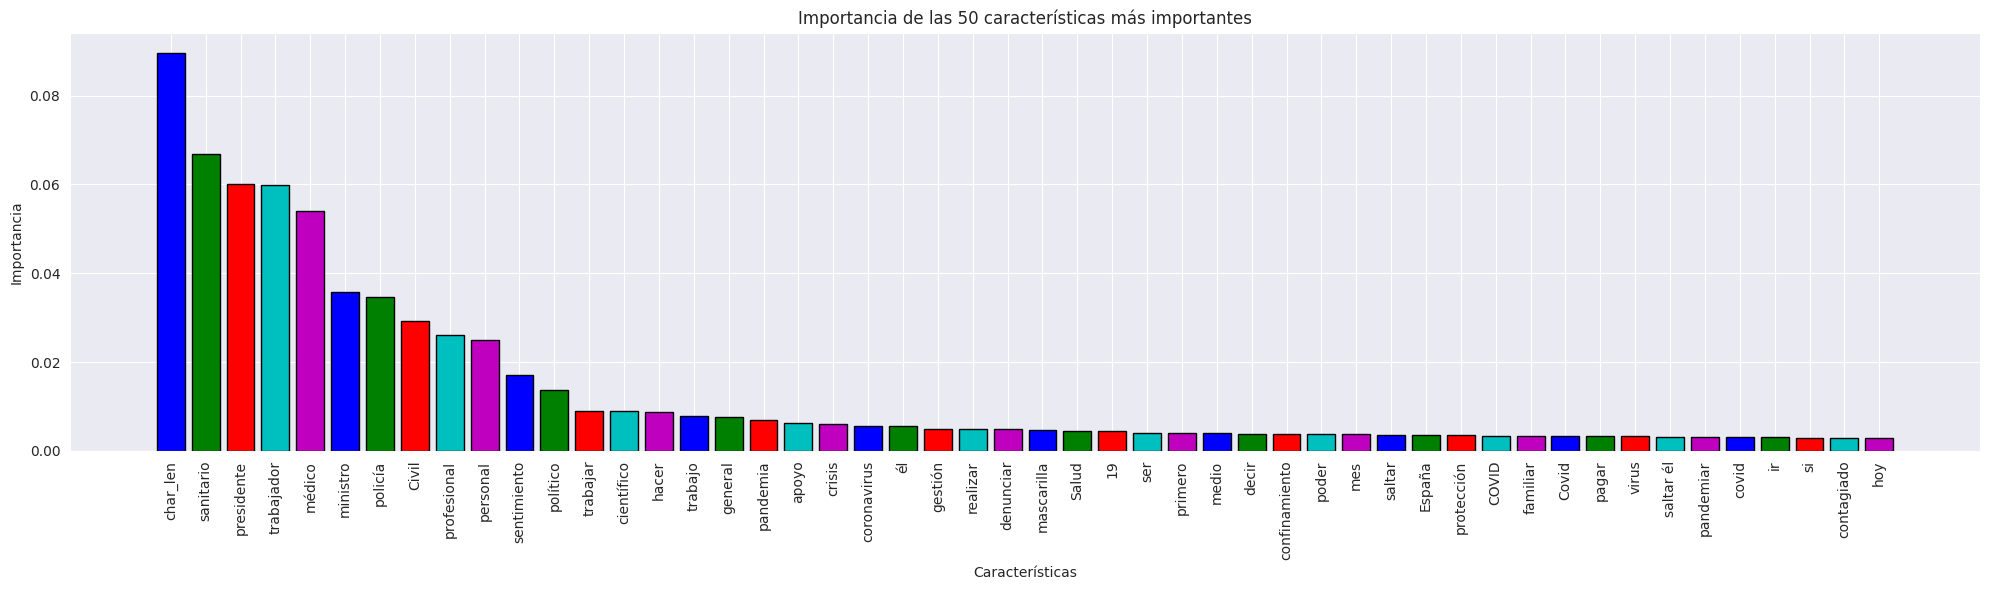

In [ ]:
# Obtener los índices de las categorías ordenadas por importancia de mayor a menor
sorted_indices = np.argsort(importance)[::-1]

# Obtener las 50 categorías con mayor importancia
top_50_categories = [X_columns[i] for i in sorted_indices[:50]]

# Obtener las importancias correspondientes a las 50 categorías
top_50_importance = importance[sorted_indices][:50]

# Crear una lista de colores diferentes para las barras
colors = ['b', 'g', 'r', 'c', 'm']

# plot feature importance
plt.figure(figsize=(20, 6))  # Aumentar el tamaño de la figura
bars = plt.bar([x for x in range(len(top_50_importance))], top_50_importance, color=colors)

# Personalizar la apariencia de las barras
for i, bar in enumerate(bars):
    bar.set_edgecolor('black')

# Configurar los nombres de las características en el eje x
plt.xticks(range(len(top_50_importance)), top_50_categories, rotation='vertical')

# Agregar etiquetas y título al gráfico
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.title('Importancia de las 50 características más importantes')
plt.tight_layout()
plt.show()



Observando la gráfica podemos extraer como conclusión, que según lo previsto y los pasos desarrollados anteriormente, las características con mayor importancia a la hora de clasificar los tweets con nuestro modelo serán aquellas que representan nombres concretos de profesiones: sanitario, médico, trabajador, presidente, ministro, policía... Esto nos confirma nuestro bien trabajo realizado